# Introduction à sympy

In [136]:
# Attention : sympy import sin, cos, pi, ...
# Ne pas faire un from numpy import * (ou from math import *)
from sympy import *
init_printing() # Permet d'afficher les équations

In [91]:
x = Symbol('x')

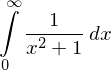

In [28]:
# Expression formelle
mon_integrale = Integral(1/(1+x**2), (x, 0, oo))
mon_integrale

In [29]:
# Calcul de l'intégrale
mon_integrale.doit()

Integral(1/(x**2 + 1), (x, 0, oo))


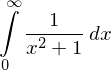

\int\limits_{0}^{\infty} \frac{1}{x^{2} + 1}\, dx


In [21]:
# Représenter une expression
print(mon_integrale) # permet de faire une copier/coller
display(mon_integrale) # Affiche joliment. 
print(latex(mon_integrale)) # Représentation pour latex

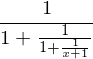

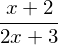

In [39]:
# Simplification
# Fonction ou méthode simplify

expr = 1/(1+1/(1+1/(1+x)))
display(expr)
display(simplify(expr))

In [155]:
# Expansion
# Fonction ou méthode expand

a = Symbol('a')
b = Symbol('b')

expr = (a+b)**3
expr.expand()

In [151]:
# Remplacer des valeurs
expr = sin(x)

display(expr.subs(x, acos(y)))

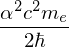

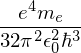

137.035999185956


In [170]:
alpha = Symbol('alpha')
display(alpha)

e = Symbol('e')
epsilon_0 = Symbol('epsilon_0')
hbar = Symbol('hbar')
c = Symbol('c')
m_e = Symbol('m_e')

fine_structure = e**2/(4*pi*epsilon_0*hbar*c)

rydberg = m_e *c**2*alpha**2/2/hbar
display(rydberg)
rydberg = simplify(rydberg.subs(alpha, fine_structure) )
display(rydberg)

numerical_values = {
    e : 1.60217662E-19,
    epsilon_0 : 8.8541878128E-12,
    hbar : 1.0545718E-34,
    c : 299792458,
    m_e : 9.10938356E-31
}

print(N(1/fine_structure).subs(numerical_values))
N(rydberg).subs(numerical_values)

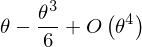

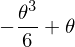

In [49]:
# Devellopement limité

dev_sin = sin(theta).series(theta, 0, n=4)
display(dev_sin)
display(dev_sin.removeO())

In [104]:
# Limite

limit(sin(x)/x, x, 0)

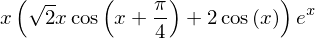

In [86]:
# Dérivées

expr = x**2 * exp(x) * cos(x)
simplify(expr.diff(x))

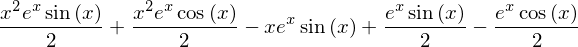

In [88]:
# Intégrales 
integrate(x**2 * exp(x) * cos(x), x)


In [65]:
# Conversion vers numpy

resultat = integrate(x**2 * exp(x) * cos(x), x)
resultat_numpy = lambdify(x, resultat)

In [74]:
# Vérifier des calculs manuels

expr1 = (a + I*b)**2
expr2 = a**2 - b**2  + 2*I*a*b
display(expr1)
display(expr2)
assert simplify(expr1-expr2)==0

In [77]:
# Lettres grec, indices
alpha = Symbol('alpha')
x_0 = Symbol('x_0')
display(alpha, x_0)

In [78]:
# Constantes
display(pi, I)

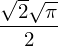

In [82]:
# Attenion ne pas utiliser de float
display(sqrt(pi/2))
display(sqrt((1/2)*pi))

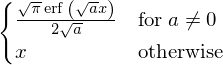

In [105]:
# Assumption : permet de donner les conditions pour simplifier le calcul

a = Symbol('a')
integrate(exp(-a*x**2), x)

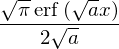

In [106]:
a = Symbol('a', positive=True)
integrate(exp(-a*x**2), x)

In [85]:
# Ne pas oublier ce que l'on sait faire en python (boucle for, fonction!!!)

out = 0
for i, letter in enumerate('abcdefgh'):
    out += Symbol(letter)*x**i
display(out)

In [131]:

theta = Symbol('theta')
r = Symbol('r', positive=True)
phi = Symbol('phi')

def polar_gradient(u):
    return u.diff(r), u.diff(theta)/r, u.diff(phi)/(r*sin(theta))

def polar_divergence(u_r, u_theta, u_phi):
    return (u_r.diff(r) + 2*u_r/r + 
            u_theta.diff(theta)/r + u_theta*cos(theta)/(r*sin(theta)) + 
            u_phi.diff(phi)/(r*sin(theta)))

def polar_laplacien(u):
    return polar_divergence(*polar_gradient(u))


In [147]:
polar_laplacien(1/r)

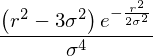

In [148]:
sigma = Symbol('sigma')
simplify(polar_laplacien(exp(-r**2/(2*sigma**2))))

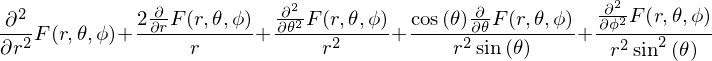

In [149]:
F = Function('F')
polar_laplacien(F(r, theta, phi))